In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
df = pd.read_csv("titanic_cleaned.csv")

In [4]:
df = df.drop(['name', 'ticket'], axis=1)

In [5]:
df['sex'] = df['sex'].map({'male' : 0, 'female': 1})

In [6]:
df = pd.get_dummies(df, columns =['deck' , 'embarked'], drop_first = True, dtype = int)

In [7]:
df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,has_cabin,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_unknown,embarked_Q,embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,1,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,0,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,1,0,1
3,4,1,1,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,0,0,0,0,0,0,1,0,1


In [8]:
x = df.drop('survived', axis=1)   # features
y = df['survived']  #target
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.2,
    random_state = 42,
    stratify=y
)

In [9]:
train_df = pd.concat([x_train, y_train], axis = 1)
test_df = pd.concat([x_test, y_test], axis = 1)
train_df.to_excel('train.xlsx' , index = False)
test_df.to_excel('test.xlsx' , index = False)

In [10]:
# Split the cleaned dataset into 80% training and 20% testing data

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [12]:
data = pd.read_excel("train.xlsx")

In [13]:
data.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,has_cabin,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_unknown,embarked_Q,embarked_S,survived
0,693,3,0,25.0,0,0,56.4958,0,0,0,0,0,0,0,0,1,0,1,1
1,482,2,0,30.0,0,0,0.0000,0,0,0,0,0,0,0,0,1,0,1,0
2,528,1,0,40.0,0,0,221.7792,1,0,1,0,0,0,0,0,0,0,1,0
3,856,3,1,18.0,0,1,9.3500,0,0,0,0,0,0,0,0,1,0,1,1
4,802,2,1,31.0,1,1,26.2500,0,0,0,0,0,0,0,0,1,0,1,1


In [14]:
x_train = train_df.drop('survived', axis=1)
y_train = train_df['survived']

x_test = test_df.drop('survived', axis=1)
y_test = test_df['survived']

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
model = LogisticRegression(max_iter=1000)

In [17]:
model.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
y_pred = model.predict(x_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred) * 100)

Logistic Regression Accuracy: 79.3296089385475


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[95 15]
 [22 47]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [22]:
# Heatmap of the confusion matrix showing correct and incorrect predictions

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test = actual labels
# y_pred = predictions from your model

In [24]:
cm = confusion_matrix(y_test, y_pred)

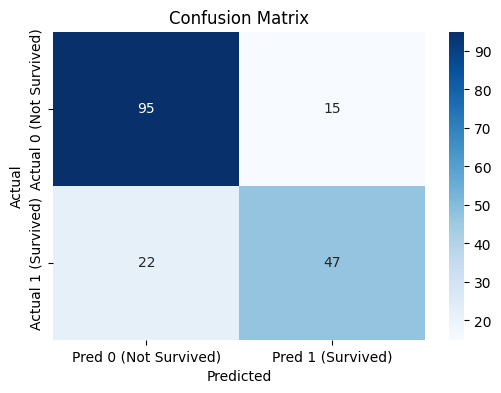

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred 0 (Not Survived)', 'Pred 1 (Survived)'],
            yticklabels=['Actual 0 (Not Survived)', 'Actual 1 (Survived)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
